In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Panorama Geral
Podemos inciar importando o dataset em questão e analisar sua estrutura básica inicial

In [2]:
df = pd.read_csv('df_athlete_events.csv')
df.drop_duplicates(inplace=True)
df.head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45554 entries, 0 to 45566
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Athlete_ID  45554 non-null  int64  
 1   Name        45554 non-null  object 
 2   Sex         45554 non-null  object 
 3   Age         44585 non-null  float64
 4   Height      35547 non-null  float64
 5   Weight      34926 non-null  object 
 6   Team        45554 non-null  object 
 7   NOC         45554 non-null  object 
 8   Games       45554 non-null  object 
 9   Year        45554 non-null  int64  
 10  Season      45554 non-null  object 
 11  City        45554 non-null  object 
 12  Sport       45554 non-null  object 
 13  Event       45554 non-null  object 
 14  Medal       39793 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 5.6+ MB


<AxesSubplot:>

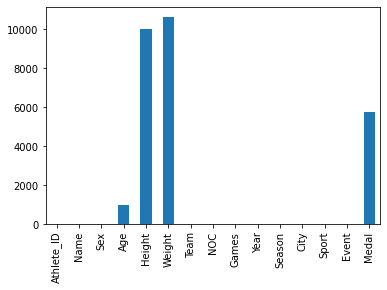

In [4]:
df.isna().sum().plot(kind='bar')

A partir do gráfico acima, conseguimos observar de forma simplificada em quais categorias existem valores nulos no formato 'NaN'. É importante nos atentarmos ao fato de que é possível, ainda, que existam outros valores declarados fora do padrão ou outros valores nulos preenchidos de formas diferentes do 'NaN'. Para isso, analisaremos cada categoria separadamente:

In [5]:
print(df.apply(lambda col: col.unique()))

Athlete_ID    [4, 6, 15, 16, 17, 20, 21, 25, 29, 30, 37, 38,...
Name          [Edgar Lindenau Aabye, Per Knut Aaland, Arvo O...
Sex           [M, MALE, FEMALE, F, Vic vai te dar um socao, ...
Age           [34.0, 31.0, 30.0, 28.0, 32.0, 20.0, 22.0, 27....
Height        [nan, 188.0, 184.0, 175.0, 176.0, 163.0, 189.0...
Weight        [nan, 75.0, 85.0, 64.0, 72.0, 90.0, 87.0, 49.0...
Team          [Denmark/Sweden, United States, Finland, Norwa...
NOC           [DEN, USA, FIN, NOR, NED, FRA, ITA, ESP, AZE, ...
Games         [1900 Summer, 1992 Winter, 1920 Summer, 2014 W...
Year          [1900, 1992, 1920, 2014, 1948, 1952, 1994, 200...
Season        [Summer, Winter, #ForaBolsonaro, Ele nunca, El...
City          [Paris, Albertville, Antwerpen, Sochi, London,...
Sport         [Tug-Of-War, Cross Country Skiing, Swimming, I...
Event         [Tug-Of-War Men's Tug-Of-War, Cross Country Sk...
Medal                       [Gold, nan, Bronze, Silver, Nelson]
dtype: object


Como esperado, existem valores que incorretos e não vazios que compõem parte do dataset. Podemos explorá-los de forma mais completa e corrigí-los:

In [6]:
cols = []
colunas = df.columns
for col in colunas:
    cols.append(col)

for col in cols:
    print(f"'{col}': \n {df[col].unique()}")

'Athlete_ID': 
 [     4      6     15 ... 135553 135554 135563]
'Name': 
 ['Edgar Lindenau Aabye' 'Per Knut Aaland' 'Arvo Ossian Aaltonen' ...
 'Galina Ivanovna Zybina (-Fyodorova)' 'Bogusaw Zych'
 'Olesya Nikolayevna Zykina']
'Sex': 
 ['M' 'MALE' 'FEMALE' 'F' 'Vic vai te dar um socao' 'P&D >> Comunidade']
'Age': 
 [34. 31. 30. 28. 32. 20. 22. 27. 24. 26. 23. 25. 21. 38. 29. 33. nan 41.
 35. 19. 36. 15. 17. 16. 18. 43. 37. 45. 39. 53. 47. 44. 49. 40. 52. 14.
 54. 48. 46. 56. 42. 58. 13. 70. 60. 50. 51. 62. 57. 61. 66. 55. 65. 73.
 12. 72. 68. 59. 11. 69. 63. 64. 10. 71.]
'Height': 
 [         nan 1.880000e+02 1.840000e+02 1.750000e+02 1.760000e+02
 1.630000e+02 1.890000e+02 1.820000e+02 1.980000e+02 1.940000e+02
 1.650000e+02 1.790000e+02 1.780000e+02 1.800000e+02 1.850000e+02
 1.860000e+02 1.810000e+02 1.900000e+02 1.870000e+02 1.910000e+02
 1.700000e+02 1.730000e+02 1.690000e+02 1.600000e+02 1.670000e+02
 2.020000e+02 1.770000e+02 1.796909e+06 5.977400e+05 5.134640e+05
 1.660000e+02 

# 2) Limpeza e Organização dos Dados

# 2.1) Dados Categóricos
    Trataremos primeiro os valores das colunas categóricas. São elas as que necessitam de reorganização: "Sex", "Season", "City", "Medal" e "Team".

### 2.1.1) "Sex"

In [7]:
df["Sex"].value_counts()

M                          31651
F                          11728
MALE                         765
FEMALE                       765
P&D >> Comunidade            333
Vic vai te dar um socao      312
Name: Sex, dtype: int64

Podemos padronizar a coluna transformando "MALE" e "FEMALE" em "M" e "F", respectivamente.

Para "P&D >> Comunidade" e "Vic vai te dar um socao", podemos arriscar e buscar algum padrão para a substituição.

In [8]:
print(df.loc[df["Sex"] == "Vic vai te dar um socao", ["Name", "Sex"]])
print(df.loc[df["Sex"] == "P&D >> Comunidade", ["Name", "Sex"]])

                              Name                      Sex
21                Pepijn Aardewijn  Vic vai te dar um socao
131              Pawe Abratkiewicz  Vic vai te dar um socao
227           Derrick Ralph Adkins  Vic vai te dar um socao
355           Janne Petteri Ahonen  Vic vai te dar um socao
404                  Geard Ajetovi  Vic vai te dar um socao
...                            ...                      ...
44407  Yury Aleksandrovich Yakimov  Vic vai te dar um socao
44542   Dmitry Semyonovich Yaparov  Vic vai te dar um socao
44739           Yoshikatsu Yoshida  Vic vai te dar um socao
44842  Denys Serhiyovych Yurchenko  Vic vai te dar um socao
44982       Javier Adelmar Zanetti  Vic vai te dar um socao

[312 rows x 2 columns]
                                                    Name                Sex
365                     Mara Magdalena Aicega Amicarelli  P&D >> Comunidade
399                                        Eirini Andili  P&D >> Comunidade
432                         

Podemos perceber, portanto, que "Vic vai te dar um socao" e "P&D >> Comunidade" estão relacionados a "M" e "F", respectivamente. Realizaremos todas as substituições abaixo, encerrando o tratamento desta primeira coluna:

In [9]:
df["Sex"].value_counts()

M                          31651
F                          11728
MALE                         765
FEMALE                       765
P&D >> Comunidade            333
Vic vai te dar um socao      312
Name: Sex, dtype: int64

In [10]:
df["Sex"].replace({"MALE": "M", "FEMALE": "F", "Vic vai te dar um socao":"M", "P&D >> Comunidade":"F"}, inplace=True)
df["Sex"].value_counts()

M    32728
F    12826
Name: Sex, dtype: int64

### 2.2.2) "Season"
    Podemos adotar o mesmo método para todas colunas categórias. As devidas diferenças serão pontuadas, mas o processo será mantido e, portanto, não discutiremos todas passagens novamente.

In [11]:
df["Season"].value_counts()

Summer            38594
Winter             6808
#ForaBolsonaro       72
Ele não              50
Ele nunca            30
Name: Season, dtype: int64

In [12]:
df.loc[(df["Season"] != "Winter") & (df["Season"] != "Summer")][["Season", "Games"]]

,Season,Games
1141,#ForaBolsonaro,1976 Summer
1701,#ForaBolsonaro,2004 Summer
2371,Ele nunca,2004 Summer
2568,Ele não,2008 Summer
2626,#ForaBolsonaro,1972 Summer
...,...,...
44051,#ForaBolsonaro,1948 Summer
44531,#ForaBolsonaro,2000 Summer
44952,Ele não,2000 Summer
45102,Ele nunca,1992 Winter


Aqui não existe um padrão claramente definido como no último, mas podemos obter a "Season" a qual o participante faz parte a partir da coluna "Games":

In [13]:
def condicao(row):
    if (row["Season"] != "Winter") and (row["Season"] != "Summer"):
        return row["Games"].split()[-1]
    else:
        return row["Season"]
        
df["Season"] = df.apply(lambda row: condicao(row), axis=1)

In [14]:
df["Season"].value_counts()

Summer    38719
Winter     6835
Name: Season, dtype: int64

### 2.2.3) "City"
    Para esta feature categórica, precisaremos tratar dos dados indicados como "######". É possível perceber que existe como identificar o local onde se passou a Olimpíada pelo ano (Coluna Games).

In [15]:
df["City"].value_counts()

London                    4091
Athina                    2886
Los Angeles               2377
Beijing                   2310
Rio de Janeiro            2301
Sydney                    2267
Atlanta                   2124
Barcelona                 1983
Seoul                     1839
Paris                     1578
Montreal                  1522
Moskva                    1521
Munich                    1407
Antwerpen                 1376
Mexico City               1242
Tokyo                     1198
Roma                      1076
Helsinki                  1074
Stockholm                 1070
Berlin                    1036
Melbourne                  963
Amsterdam                  849
Sochi                      709
Torino                     624
Vancouver                  622
Salt Lake City             563
Nagano                     521
St. Louis                  518
Innsbruck                  497
Lillehammer                412
Albertville                403
Lake Placid                351
Calgary 

In [16]:
# Antes do merge, é importante notar que existe uma edição em que num mesmo ano, foram utilizadas duas cidades diferentes.
# Analisando o dataset, pode-se perceber que existe uma duplicata para "1956 Summer", que ocorreu tanto em "Stockholm" e "Melbourn"
# Em "Stockholm", ocorreu apenas "Equestrianism", que não possui entradas no formato "######"
# Desta forma, podemos ignorar o index 25 da tabela auxiliar

df_aux = df.groupby(["Games", "City"], as_index=False).mean()
df_aux = df_aux[df_aux["City"] != "######"][["Games", "City"]]
df_aux.drop(index=25, inplace=True)

In [17]:
# Posteriormente, podemos dar um "merge", substituindo os valores da coluna da cidade com base na tabela corrigida acima.
# Aplicando o comando sobre a coluna "Games", podemos substituir os valores incorretos no dataframe original.
df = df.merge(df_aux, how="left", on="Games")

# Por questão de padronização:
df["City_x"] = df["City_y"]
df = df.drop(["City_y"], axis=1)
df.rename(columns={"City_x":"City"}, inplace=True)

# Verificando:
df["City"].value_counts()

London                    4102
Athina                    2899
Los Angeles               2380
Beijing                   2321
Rio de Janeiro            2311
Sydney                    2279
Atlanta                   2135
Barcelona                 1990
Seoul                     1844
Paris                     1579
Montreal                  1527
Moskva                    1525
Munich                    1411
Antwerpen                 1376
Mexico City               1246
Tokyo                     1203
Roma                      1076
Helsinki                  1075
Berlin                    1037
Stockholm                 1026
Melbourne                 1007
Amsterdam                  852
Sochi                      713
Torino                     627
Vancouver                  627
Salt Lake City             566
Nagano                     522
St. Louis                  518
Innsbruck                  497
Lillehammer                413
Albertville                404
Lake Placid                351
Calgary 

### 2.2.4) "Medal"


In [18]:
df["Medal"].value_counts()

Gold      13317
Bronze    13255
Silver    13055
Nelson      166
Name: Medal, dtype: int64

Conferindo alguns dos valores vazios (NaN) para os atletas, podemos perceber que valores tratados como "NaN" correspondem aos não medalhistas. Desta forma, não faz sentido tratarmos os "Nelson" como "NaN". Como se trata apenas de 167 valores, é mais sensato que deletemos estas colunas.

In [19]:
df = df[df.Medal != "Nelson"]

In [20]:
df["Medal"].value_counts()

Gold      13317
Bronze    13255
Silver    13055
Name: Medal, dtype: int64

### 2.2.5) "Team"
    No que diz respeito aos nomes dos times, podemos fazer o processo análogo ao que foi feito na categoria "City". Ocorre, entretanto, que alguns atletas não possuem histórico de outras participações em times, o que complica o processo de nomeação. Não podemos fazer a compleção dos dados a partir do NOC, pois tornaria os dados imprecisos, uma vez que existem variados times para um mesmo NOC. Desta forma, aplicamos o que foi primeiro descrito e tratamos os outros dados como incognitas 'NaN'.

In [21]:
df["Team"] = df["Team"].apply(lambda string: string.split("-")[0])

In [22]:
df_aux3 = df.groupby(["Name", "Team"], as_index=False).mean()
df_aux4 = df_aux3[df_aux3["Team"] == "#ForaBolsonaro"][["Name"]]
df_aux3 = df_aux3[df_aux3["Team"] != "#ForaBolsonaro"][["Name", "Team"]]

df_aux3 = df_aux3[df_aux3["Name"].duplicated() == False]

In [23]:
df_aux3[df_aux3['Name'].isin(df_aux4["Name"])][["Name", "Team"]]

,Name,Team
220,Adriana Chelariu-Bazon,Romania
585,Alejandra Laura Gulla,Argentina
591,Alejandrina Mireya Luis Hernndez,Cuba
2235,Anna A. Kozlova,United States
3802,Bonnie Kathleen Blair (-Cruikshank),United States
5351,Clara Hughes,Canada
6082,Darya Vladimirovna Domracheva,Belarus
6875,Donna Elizabeth de Varona (-Pinto),United States
10709,Grit Breuer (-Springstein),East Germany
10753,Gudrun Beckmann,West Germany


In [24]:
df = df.merge(df_aux3, how="left", on="Name")

In [25]:
# Por questão de padronização:
df["Team_x"] = df["Team_y"]
df = df.drop(["Team_y"], axis=1)
df.rename(columns={"Team_x":"Team"}, inplace=True)

# 2.2) Dados Numéricos

## 2.2.1) Height
    Podemos começar o tratamento dos dados numéricos explorando os dados de altura (Height).

In [26]:
df["Height"].describe()

count    3.539400e+04
mean     9.764576e+02
std      3.454219e+04
min      1.320000e+02
25%      1.700000e+02
50%      1.780000e+02
75%      1.850000e+02
max      1.976779e+06
Name: Height, dtype: float64

<AxesSubplot:>

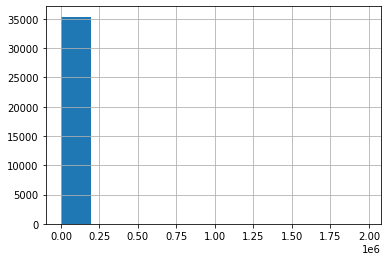

In [27]:
df["Height"].hist()

Podemos eliminar os outliers a partir da função .between do proprio Pandas. Para isso, especificamos o intervalo que deverá ser adotado. O valor atribuído abaixo de 0.9993 é um metaparâmetro que foi testado manualmente e escolhido a partir do corte aceitável.

Note que a função .between() utiliza também dos valores nulos NaN. Com isso em mente, precisamos separar os valores nulos dos valores numéricos e depois concatená-los de volta. Assim:

In [28]:
df_aux2 = df[df["Height"].isna() == True]
df = df[df['Height'].notna()]
df = df[df["Height"].between(df["Height"].quantile(0), df["Height"].quantile(.9993))]
df = pd.concat([df, df_aux2])

<AxesSubplot:>

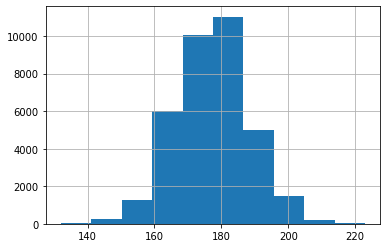

In [29]:
df["Height"].hist()

## 2.2.2) Weight
    Para o caso do peso (Weight):

In [30]:
df["Weight"].describe()

count     34751
unique      188
top        70.0
freq       1439
Name: Weight, dtype: object

In [31]:
df[df["Weight"] == "hsuahusahu"].count()

Athlete_ID    490
Name          490
Sex           490
Age           489
Height        457
Weight        490
Team          489
NOC           490
Games         490
Year          490
Season        490
City          490
Sport         490
Event         490
Medal         421
dtype: int64

Como existem relativamente poucos valores atribuídos a "hsuahusahu", é mais interessante que o tratemos como np.nan do que realizar o .drop da linha toda. Assim:

In [32]:
df["Weight"].replace({"hsuahusahu": np.nan}, inplace=True)

In [33]:
df["Weight"] = df["Weight"].astype(float)

## 2.2.3) Year
    Para esta categoria, podemos corrigir os valores negativos a partir do .split() da categoria "Games", de modo similar ao que foi feito na categoria "Season".

In [34]:
df["Year"].value_counts()

 1992    2377
 2008    2304
 2016    2292
 2000    2257
 2004    2245
         ... 
-248        1
-670        1
-182        1
-765        1
-783        1
Name: Year, Length: 65, dtype: int64

In [35]:
df.loc[df["Year"] < 0][["Year", "Games"]]

,Year,Games
21,-765,1996 Summer
22,-182,1996 Summer
239,-670,2008 Summer
240,-248,2008 Summer
241,-825,2012 Summer
525,-2378,1948 Summer
526,-1143,1968 Summer
528,-2813,2008 Summer
1516,-2491,2008 Summer
5100,-1084,2000 Summer


In [36]:
# Definindo e aplicando a função de correção:

def condicao_year(row):
    if row["Year"] < 0:
        return row["Games"].split()[0]
    else:
        return row["Year"]
    
df["Year"] = df.apply(lambda row: condicao_year(row), axis=1)
df["Year"] = df["Year"].astype(int)

In [37]:
# Conferindo:

df["Year"].value_counts()

1992    2380
2008    2309
2016    2292
2000    2258
2004    2247
2012    2211
1988    2166
1996    2128
1984    1959
1976    1775
1980    1772
1972    1636
1968    1488
1964    1445
1920    1376
1960    1242
1952    1237
1956    1173
1936    1168
1948    1123
1924    1090
1912    1024
1928     951
1908     899
1932     790
2014     710
2006     624
1900     621
2010     621
2002     562
1998     520
1904     518
1906     493
1994     407
1896     149
Name: Year, dtype: int64

In [38]:
# Podemos aproveitar e verificar se todos os dados da categoria "Year" estão de acordo com o ano apontado na categoeria "Games"
# Do modo em que implementamos a função abaixo, se nenhum valor for retornado, significa que todos estão de acordo.

df[df["Year"] != df["Games"].apply(lambda x: int(x.split()[0]))]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [39]:
# Visão geral do dataset tratado:
df.head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
5,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
6,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
7,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold


#### Encerramos por aqui o tratamento dos dados geral. É importante notar que ainda precisamos lidar com os valores nulos, mas podemos tratá-los conforme realizamos a análise de dados exploratória pertinente às categorias numéricas, pois assim podemos utilizar de diferentes estratégias para cada uma delas.

 # 3) Análise de Dados Exploratória

## 3.1) Análise Categórica

### 3.1.1) Panorâma dos Recordistas

Podemos iniciar a análise dos dados categóricos com uma visão geral sobre os recordistas. Algumas análises interessantes são:

a) Países que melhor perfomaram ao longo dos anos;

b) Atletas recordistas que mais acumularam pontos por medalha ao longo dos anos (Por padrão olímpico, Ouro=1pt, Prata=2pt, Bronze=1pt).

### 3.1.1.a) Performance dos países

In [40]:
df_summer = df[df['Season'] == "Summer"]
df_winter = df[df['Season'] == "Winter"]

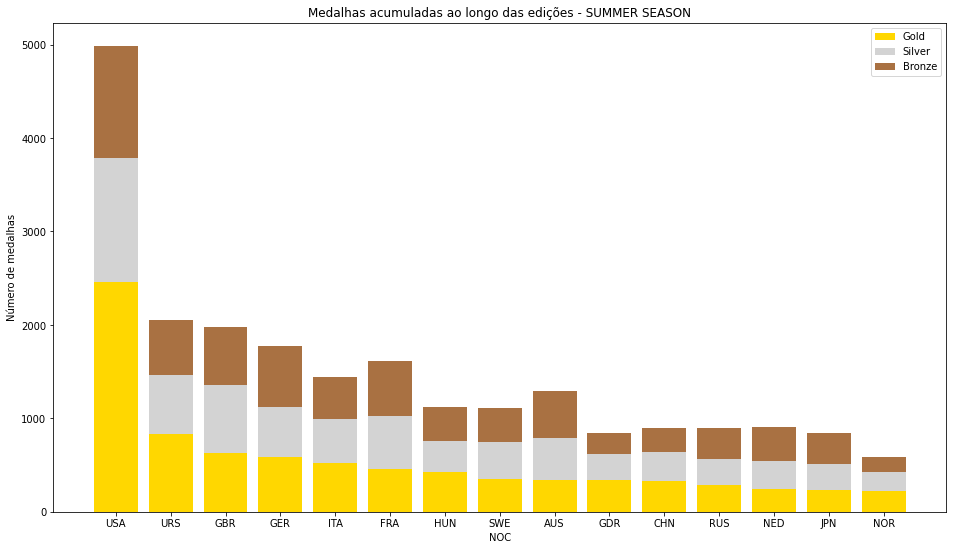

In [41]:
#Summer
df_aux5 = df_summer[["NOC", "Medal"]]
medals = pd.get_dummies(df_aux5, columns=["Medal"]).groupby(["NOC"]).sum()
medals = medals[['Medal_Bronze', 'Medal_Silver', 'Medal_Gold']]
medals = medals.sort_values(by=['Medal_Gold', 'Medal_Silver', 'Medal_Bronze'], ascending=False)
medals["Total"] = medals["Medal_Gold"] + medals["Medal_Silver"] + medals["Medal_Bronze"]
medals = medals.head(15)
fig, ax = plt.subplots()
ax.bar(medals.index, medals["Medal_Gold"], label="Gold", color="Gold")
ax.bar(medals.index, medals["Medal_Silver"], bottom=medals["Medal_Gold"], label="Silver", color="Lightgray")
ax.bar(medals.index, medals["Medal_Bronze"], bottom=medals["Medal_Gold"] + medals["Medal_Silver"], label="Bronze", color="#a97142")
ax.set_xlabel("NOC")
ax.set_ylabel("Número de medalhas")
ax.set_title("Medalhas acumuladas ao longo das edições - SUMMER SEASON")
fig.set_size_inches(16, 9)
ax.legend()
plt.show()

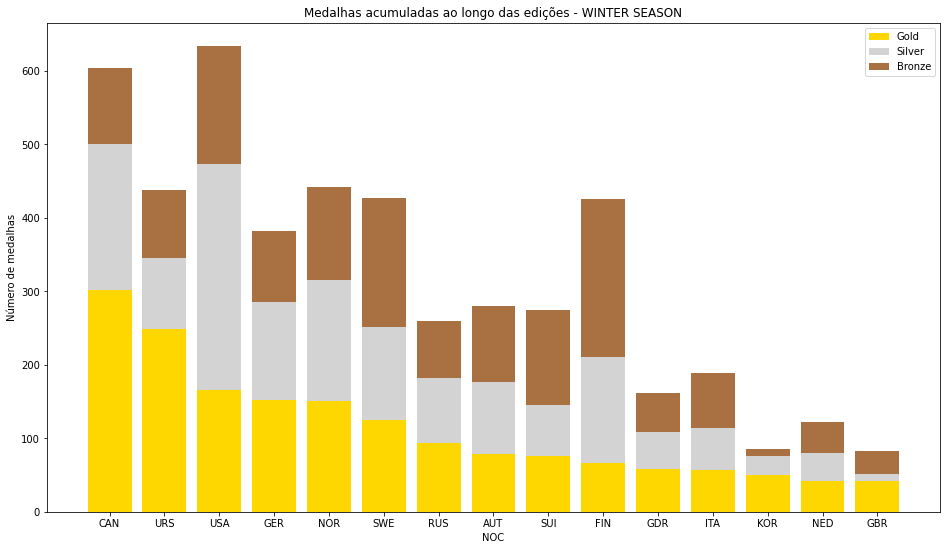

In [42]:
#Winter
df_aux5w = df_winter[["NOC", "Medal"]]
medalsw = pd.get_dummies(df_aux5w, columns=["Medal"]).groupby(["NOC"]).sum()
medalsw = medalsw[['Medal_Bronze', 'Medal_Silver', 'Medal_Gold']]
medalsw = medalsw.sort_values(by=['Medal_Gold', 'Medal_Silver', 'Medal_Bronze'], ascending=False)
medalsw["Total"] = medalsw["Medal_Gold"] + medalsw["Medal_Silver"] + medalsw["Medal_Bronze"]
medalsw = medalsw.head(15)
fig, ax = plt.subplots()
ax.bar(medalsw.index, medalsw["Medal_Gold"], label="Gold", color="Gold")
ax.bar(medalsw.index, medalsw["Medal_Silver"], bottom=medalsw["Medal_Gold"], label="Silver", color="Lightgray")
ax.bar(medalsw.index, medalsw["Medal_Bronze"], bottom=medalsw["Medal_Gold"] + medalsw["Medal_Silver"], label="Bronze", color="#a97142")
ax.set_xlabel("NOC")
ax.set_ylabel("Número de medalhas")
ax.set_title("Medalhas acumuladas ao longo das edições - WINTER SEASON")
fig.set_size_inches(16, 9)
ax.legend()
plt.show()

In [43]:
df_aux6 = df_summer[["NOC", "Year", "Medal"]]
df_aux6w = df_winter[["NOC", "Year", "Medal"]]

In [44]:
# Summer
medalyear = pd.get_dummies(df_aux6, columns=["Medal"])
medalyear["Total"] = medalyear["Medal_Gold"] + medalyear["Medal_Silver"] + medalyear["Medal_Bronze"]
medalyear = medalyear[["NOC", "Year","Total"]].groupby(["NOC", "Year"], as_index=False).sum()
medalyear = medalyear.pivot(index="Year", columns="NOC", values="Total")
print("Tabela de Medalhas por Ano - Summer Season")
display(medalyear[medals.index])

# Winter
medalyearw = pd.get_dummies(df_aux6, columns=["Medal"])
medalyearw["Total"] = medalyearw["Medal_Gold"] + medalyearw["Medal_Silver"] + medalyearw["Medal_Bronze"]
medalyearw = medalyearw[["NOC", "Year","Total"]].groupby(["NOC", "Year"], as_index=False).sum()
medalyearw = medalyearw.pivot(index="Year", columns="NOC", values="Total")
print("Tabela de Medalhas por Ano - Winter Season")
display(medalyearw[medalsw.index])

Tabela de Medalhas por Ano - Summer Season


NOC,USA,URS,GBR,GER,ITA,FRA,HUN,SWE,AUS,GDR,CHN,RUS,NED,JPN,NOR
Year,,,,,,,,,,,,,,,
1896,20.0,NaN,9.0,32.0,NaN,11.0,6.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1900,63.0,NaN,107.0,45.0,5.0,225.0,5.0,4.0,6.0,NaN,NaN,NaN,27.0,NaN,9.0
1904,394.0,NaN,2.0,16.0,NaN,2.0,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,2.0
1906,24.0,NaN,39.0,30.0,56.0,64.0,13.0,21.0,3.0,NaN,NaN,NaN,6.0,NaN,25.0
1908,65.0,NaN,367.0,21.0,8.0,40.0,20.0,84.0,NaN,NaN,NaN,3.0,16.0,NaN,42.0
1912,107.0,NaN,170.0,53.0,25.0,25.0,30.0,190.0,NaN,NaN,NaN,14.0,26.0,NaN,80.0
1920,194.0,NaN,111.0,NaN,84.0,141.0,NaN,154.0,7.0,NaN,NaN,NaN,50.0,3.0,137.0
1924,182.0,NaN,64.0,NaN,51.0,110.0,22.0,72.0,10.0,NaN,NaN,NaN,27.0,1.0,22.0
1928,88.0,NaN,58.0,77.0,72.0,50.0,21.0,37.0,4.0,NaN,NaN,NaN,57.0,9.0,9.0


Tabela de Medalhas por Ano - Winter Season


NOC,CAN,URS,USA,GER,NOR,SWE,RUS,AUT,SUI,FIN,GDR,ITA,KOR,NED,GBR
Year,,,,,,,,,,,,,,,
1896,NaN,NaN,20.0,32.0,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN,9.0
1900,2.0,NaN,63.0,45.0,9.0,4.0,NaN,6.0,21.0,NaN,NaN,5.0,NaN,27.0,107.0
1904,48.0,NaN,394.0,16.0,2.0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0
1906,2.0,NaN,24.0,30.0,25.0,21.0,NaN,9.0,12.0,4.0,NaN,56.0,NaN,6.0,39.0
1908,52.0,NaN,65.0,21.0,42.0,84.0,3.0,1.0,NaN,30.0,NaN,8.0,NaN,16.0,367.0
1912,8.0,NaN,107.0,53.0,80.0,190.0,14.0,13.0,2.0,71.0,NaN,25.0,NaN,26.0,170.0
1920,16.0,NaN,194.0,NaN,137.0,154.0,NaN,NaN,29.0,52.0,NaN,84.0,NaN,50.0,111.0
1924,20.0,NaN,182.0,NaN,22.0,72.0,NaN,4.0,60.0,52.0,NaN,51.0,NaN,27.0,64.0
1928,33.0,NaN,88.0,77.0,9.0,37.0,NaN,5.0,30.0,25.0,NaN,72.0,NaN,57.0,58.0


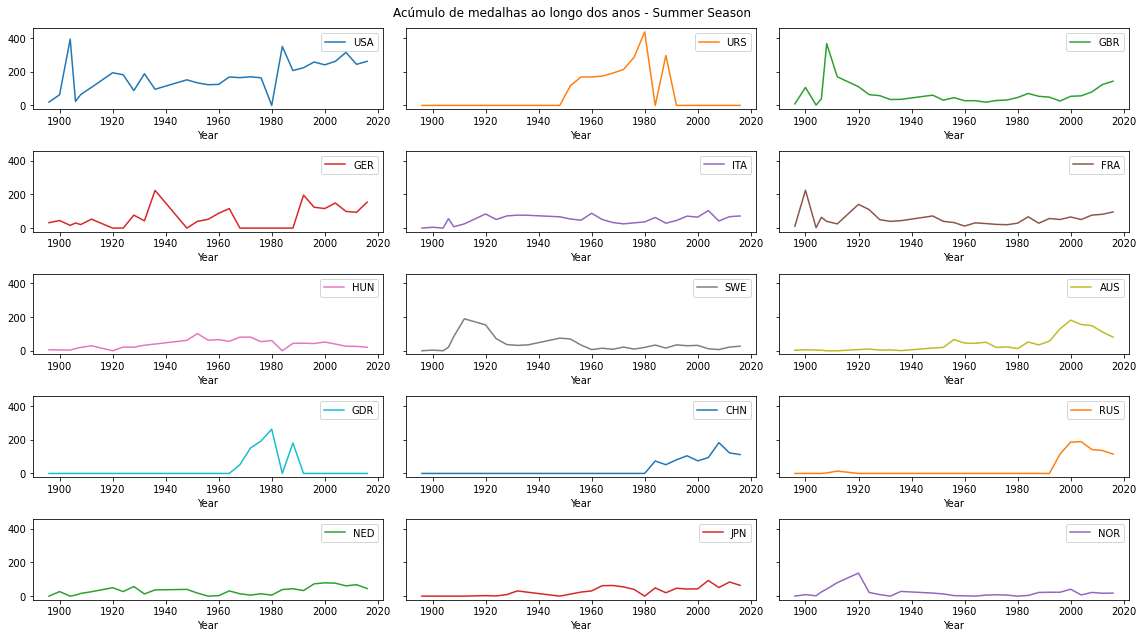

In [45]:
# Summer
medalyear = medalyear.fillna(0)
fig, ax = plt.subplots(5, 3, figsize=(16, 9), tight_layout=True, sharey=True)
medalyear[medals.index].plot(ax=ax, subplots=True)
fig.suptitle('Acúmulo de medalhas ao longo dos anos - Summer Season');

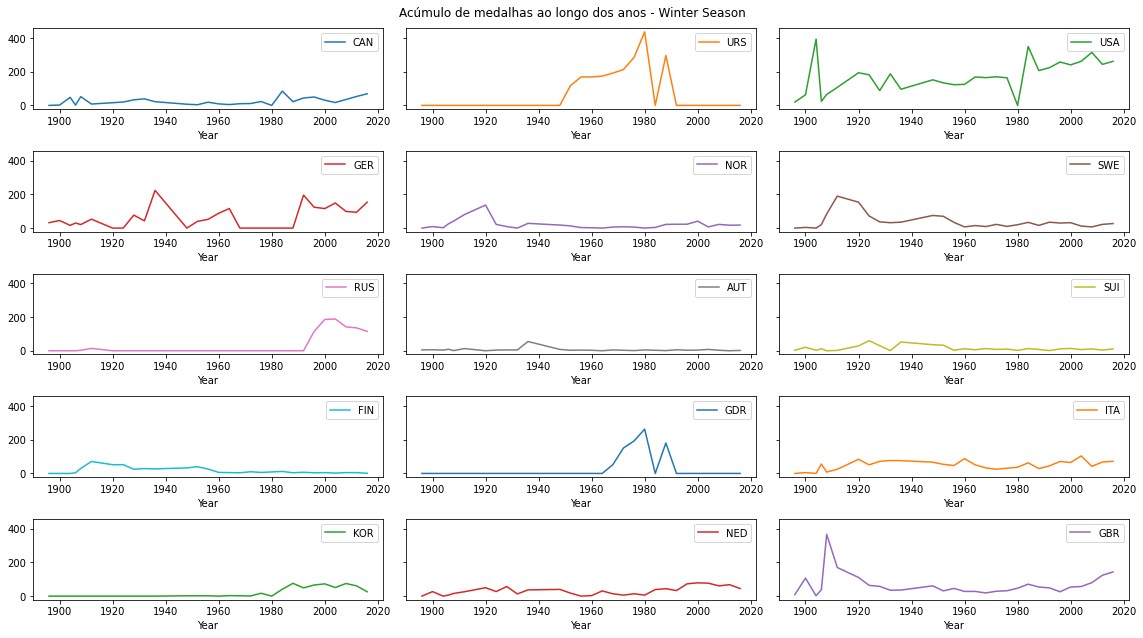

In [46]:
# Winter
medalyearw = medalyearw.fillna(0)
fig, ax = plt.subplots(5, 3, figsize=(16, 9), tight_layout=True, sharey=True)
medalyearw[medalsw.index].plot(ax=ax, subplots=True)
fig.suptitle('Acúmulo de medalhas ao longo dos anos - Winter Season');

Podemos observar que a Rússia (RUS) e a Alemanha (GER) possuem um comportamento característico, decorrente do passado histórico que diz respeito a cada uma das nações.

A China (CHN) não tinha ganhado nenhuma edição até 1984, mas tem mostrado excelente performance desde então.

Outro ponto interessante é que o Top 15 das nações que mais acumulam medalhas ao longo dos anos não são as mesmas para as temporadas de verão e inverno. Isto é, de certa forma, esperado, uma vez que países situados em altas latitudes possuem uma cultura maior em esportes de inverno.

Podemos, agora, passar para a análise dos dados numérica.

### 3.1.1.b) Performance dos atletas

Continuando a linha de raciocínio pré-estabelecida, passaremos agora para a análise dos atletas recordistas.

Relembrando que, por padrão olímpico, Ouro=1pt, Prata=2pt, Bronze=1pt.

In [47]:
df_aux5 = df_summer[["NOC", "Medal"]]
medals = pd.get_dummies(df_aux5, columns=["Medal"]).groupby(["NOC"]).sum()

In [48]:
# Summer Season Athlets
df_ath = df_summer[["Name", "NOC", "Medal", "Sex"]]
athmed = pd.get_dummies(df_ath, columns=["Medal"]).groupby(["Name", "NOC", "Sex"]).sum()
athmed = athmed[['Medal_Bronze', 'Medal_Silver', 'Medal_Gold']]
athmed["Total Points"] = 3*athmed["Medal_Gold"] + 2*athmed["Medal_Silver"] + athmed["Medal_Bronze"]
athmed = athmed.sort_values(by=['Total Points'], ascending=False)
athmed.head(10)

,,,Medal_Bronze,Medal_Silver,Medal_Gold,Total Points
Name,NOC,Sex,,,,
"Michael Fred Phelps, II",USA,M,2,3,23,77
Larysa Semenivna Latynina (Diriy-),URS,F,4,5,9,41
Nikolay Yefimovich Andrianov,URS,M,3,5,7,34
Paavo Johannes Nurmi,FIN,M,0,3,9,33
Sawao Kato,JPN,M,1,3,8,31
Borys Anfiyanovych Shakhlin,URS,M,2,4,7,31
"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",USA,F,1,3,8,31
Mark Andrew Spitz,USA,M,1,1,9,30
Edoardo Mangiarotti,ITA,M,2,5,6,30


In [49]:
# Winter Season Athlets
df_athw = df_winter[["Name", "NOC", "Medal", "Sex"]]
athmedw = pd.get_dummies(df_athw, columns=["Medal"]).groupby(["Name", "NOC", "Sex"]).sum()
athmedw = athmedw[['Medal_Bronze', 'Medal_Silver', 'Medal_Gold']]
athmedw["Total Points"] = 3*athmedw["Medal_Gold"] + 2*athmedw["Medal_Silver"] + athmedw["Medal_Bronze"]
athmedw = athmedw.sort_values(by=['Total Points'], ascending=False)
athmedw.head(10)

,,,Medal_Bronze,Medal_Silver,Medal_Gold,Total Points
Name,NOC,Sex,,,,
Ole Einar Bjrndalen,NOR,M,1,4,8,33
Marit Bjrgen,NOR,F,1,3,6,25
Claudia Pechstein,GER,F,2,2,5,21
Edy Sixten Jernberg,SWE,M,2,3,4,20
Yang Yang,CHN,F,2,6,2,20
Raisa Petrovna Smetanina,URS,F,1,5,3,20
"Irene Karlijn ""Ireen"" Wst",NED,F,1,3,4,19
Ricco Gro,GER,M,1,3,4,19
"Karin Enke-Kania (-Busch-, -Richter)",GDR,F,1,4,3,18


É interessante perceber que para os top 10 maiores medalhistas, a temporada de verão é composta majoritariamente por homens, enquanto na temporada de inverno, o top 10 é composto principalmente por mulheres.

### 3.1.2) Performance por sexo ao longo dos anos

In [50]:
dfsum_sex = df_summer[["Sex", "Year", "Medal"]].reset_index(drop=True)
# print(dfsum_sex["Sex"].value_counts())
dfsum_sex = pd.get_dummies(dfsum_sex, columns=["Medal"])
dfsum_sex["Total"] = dfsum_sex["Medal_Gold"] + dfsum_sex["Medal_Silver"] + dfsum_sex["Medal_Bronze"]
dfsum_sex = dfsum_sex[["Year", "Sex", "Total"]].groupby(["Year", "Sex"], as_index=False).sum()

dfwin_sex = df_winter[["Sex", "Year", "Medal"]].reset_index(drop=True)
# print(dfwin_sex["Sex"].value_counts())
dfwin_sex = pd.get_dummies(dfwin_sex, columns=["Medal"])
dfwin_sex["Total"] = dfwin_sex["Medal_Gold"] + dfwin_sex["Medal_Silver"] + dfwin_sex["Medal_Bronze"]
dfwin_sex = dfwin_sex[["Year", "Sex", "Total"]].groupby(["Year", "Sex"], as_index=False).sum()

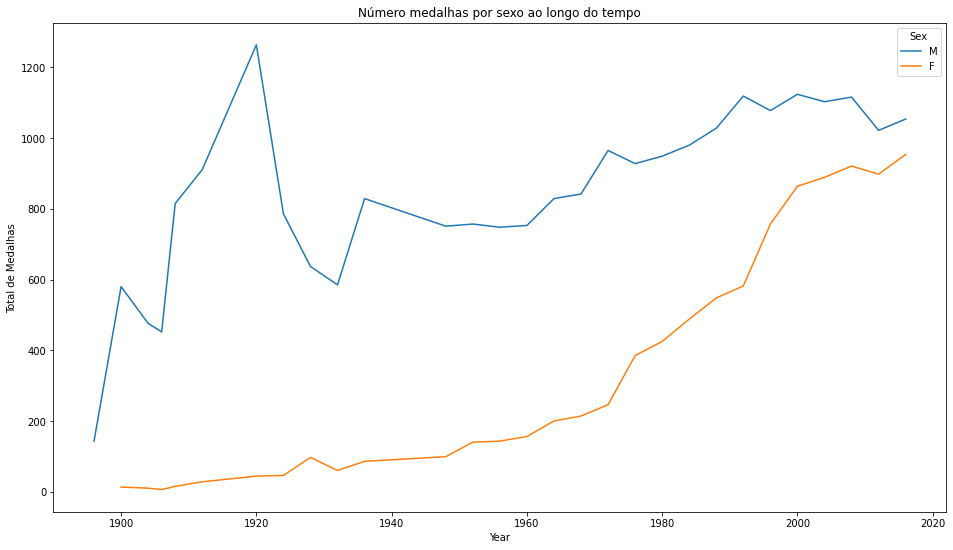

In [51]:
plt.figure(figsize=(16, 9))
sns.lineplot(x='Year', y='Total', data=dfsum_sex, hue='Sex', hue_order=["M", "F"]).set_title("Número medalhas por sexo ao longo do tempo")
plt.ylabel("Total de Medalhas");

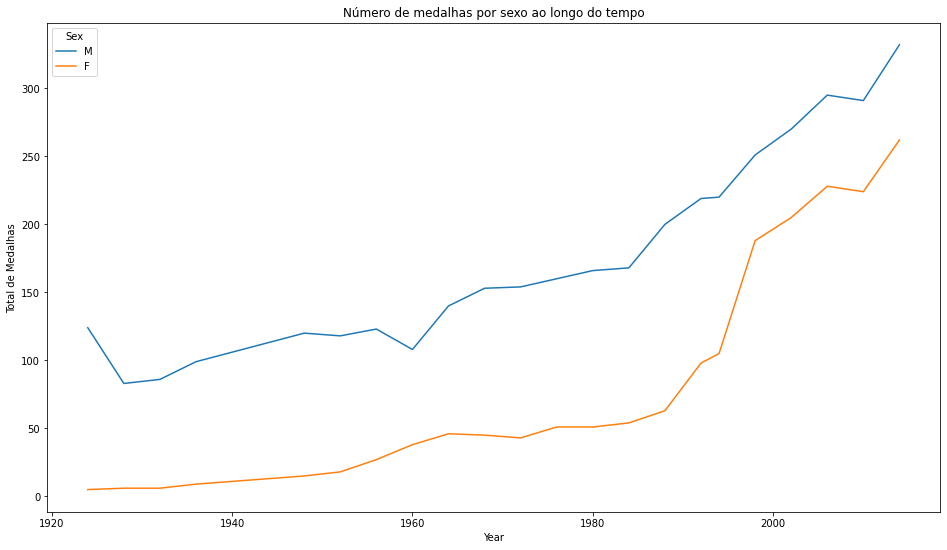

In [52]:
plt.figure(figsize=(16, 9))
sns.lineplot(x='Year', y='Total', data=dfwin_sex, hue='Sex', hue_order=["M", "F"]).set_title("Número de medalhas por sexo ao longo do tempo")
plt.ylabel("Total de Medalhas");

A partir dos gráficos acima, podemos notar que:

I) Summer Season: Existe crescimento notável no número de mulheres participantes, com grande redução da disparidade entre este número nas últimas edições;

II) Winter Season: O crescimento para os dois gêneros é similar, com redução expressiva da disparidade nas últimas edições também.

Podemos buscar alguma relação extra a partir da exploração do número de participantes por gênero ao longo do tempo:

In [53]:
dfsexcount = df_summer[["Year", "Sex"]]
dfsexcount = pd.get_dummies(dfsexcount, columns=["Sex"])
dfsexcount = dfsexcount.groupby(["Year"], as_index=False).sum()
dfsexcount.set_index("Year", inplace=True)

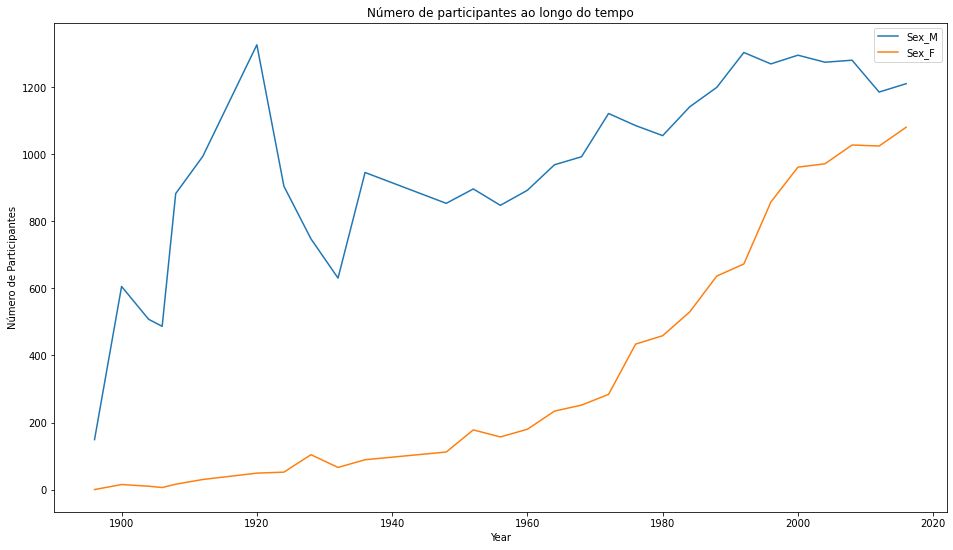

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

ax.set_title("Número de participantes ao longo do tempo")
plt.ylabel("Número de Participantes")
dfsexcount[["Sex_M", "Sex_F"]].plot(ax=ax);

Com os dados fornecidos, é difícil encontrar correlação que justifique a disparidade no número de medalhas por gênero. Podemos concluir apenas que existe um aumento expressivo no número de mulheres participantes nas últimas edições, cujo crescimento é acompanhado pelo aumento da performance também.

## 3.2) Análise Numérica

### 3.2.1) Análise de Peso e Altura
#### 3.2.1.1) Visão Geral

Podemos iniciar a análise com um panorâma geral para percebermos como o peso e a altura afetam a distribuição de medalhas

In [55]:
df_hw = df_summer[["Height", "Weight", "Medal"]].reset_index(drop=True)
hw = pd.get_dummies(df_hw, columns=["Medal"]).groupby(["Height", "Weight"], as_index=False).sum()

In [56]:
hwg = hw[["Height", "Weight", "Medal_Gold"]]
hwg = hwg[hwg["Medal_Gold"] != 0]
hws = hw[["Height", "Weight", "Medal_Silver"]]
hws = hws[hws["Medal_Silver"] != 0]
hwb = hw[["Height", "Weight", "Medal_Bronze"]]
hwb = hwb[hwb["Medal_Bronze"] != 0]

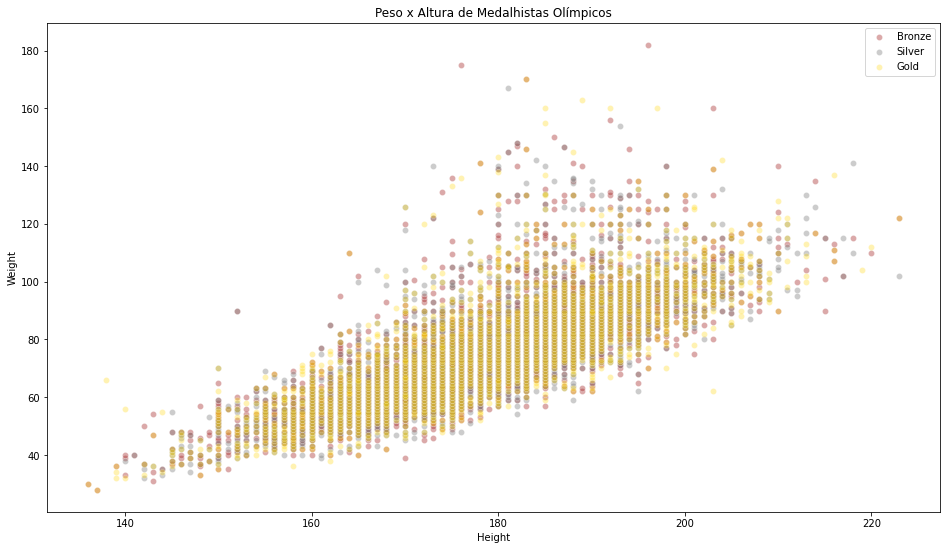

In [57]:
plt.figure(figsize=(16, 9))
sns.scatterplot(x="Height", y="Weight", data=hwb, color="brown", alpha=0.4, label="Bronze")
sns.scatterplot(x="Height", y="Weight", data=hws, color="gray", alpha=0.4, label="Silver")
sns.scatterplot(x="Height", y="Weight", data=hwg, color="Gold", alpha=0.3, label="Gold")
plt.title('Peso x Altura de Medalhistas Olímpicos');

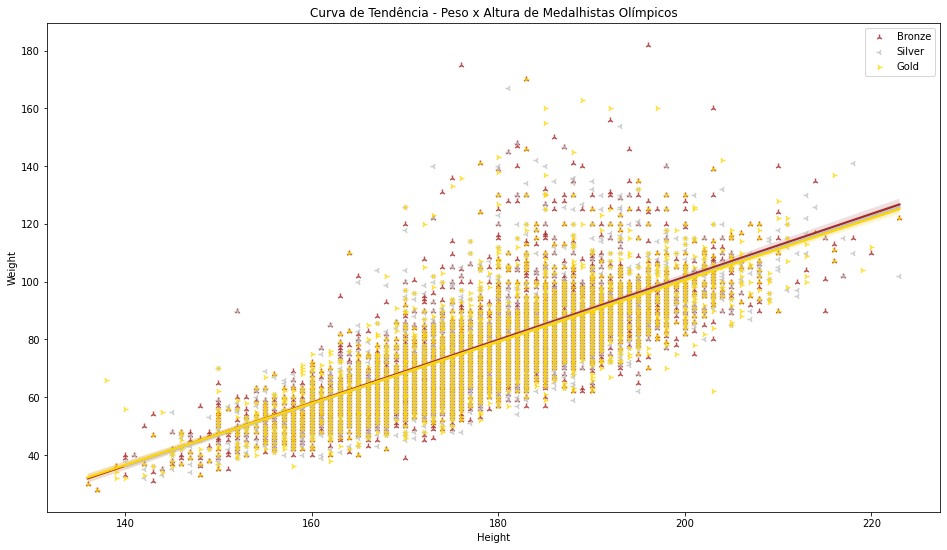

In [58]:
plt.figure(figsize=(16, 9))
ax = sns.regplot(x="Height", y="Weight", data=hwb, color="brown", label="Bronze", marker="2");
ax.legend(loc="best")
ax = sns.regplot(x="Height", y="Weight", data=hws, color="silver", label="Silver", marker="3");
ax.legend(loc="best")
ax = sns.regplot(x="Height", y="Weight", data=hwg, color="gold", label="Gold", marker="4");
ax.legend(loc="best")
plt.title('Curva de Tendência - Peso x Altura de Medalhistas Olímpicos');

Podemos perceber que existe uma relação quase linear entre peso e altura. Esta relação, entrentato, não implica necessariamente "qualidade" das medalhas. Como podemos perceber pelo gráfico 1 desta seção, existem medalhistas ouro, prata e bronze para quase todas categorias de peso x altura.

Podemos continuar esta exploração analisando a relação entre os medalhistas e os não medalhistas:

In [59]:
df_hw2 = df_summer[["Height", "Weight", "Medal"]].reset_index(drop=True)
df_hw2["Medal"].replace({"Bronze": 1, "Silver": 1, "Gold":1, np.nan:0}, inplace=True)

In [60]:
df_hw1 = df_hw2[df_hw2["Medal"] == 1]
df_hw0 = df_hw2[df_hw2["Medal"] == 0]

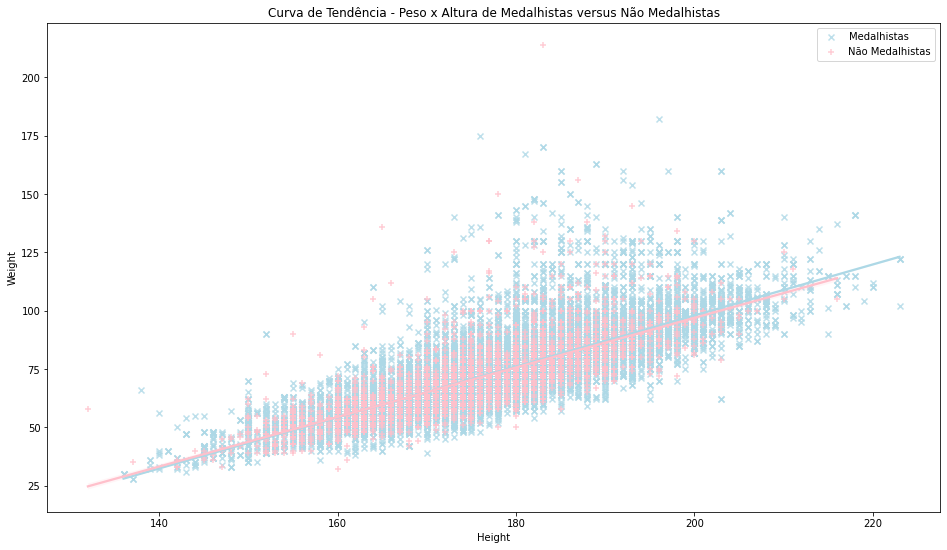

In [61]:
plt.figure(figsize=(16, 9))

ax = sns.regplot(x="Height", y="Weight", data=df_hw1, color="lightblue", marker="x", label="Medalhistas");
ax.legend(loc="best")
ax = sns.regplot(x="Height", y="Weight", data=df_hw0, color="pink", marker="+", label="Não Medalhistas");
ax.legend(loc="best")
plt.title('Curva de Tendência - Peso x Altura de Medalhistas versus Não Medalhistas');

Novamente, não há grande discrepância entre a relação de peso x altura de medalhistas e não medalhistas. Ambos possuem uma distribuição semelhante. Aparentemente, peso e altura não correspondem, necessariamente, à performance do atleta em questão de aquisição de medalhas.

#### 3.2.1.2) Outliers
É interessante explorarmos os outliers de peso e altura. Podemos ver, por exemplo, como estas categorias estão distribuída nos esportes. Para isso, podemos apenas ignorar os valores faltantes de peso e altura e considerar apenas os registrados, já que o intuito aqui é criar um panorama geral.

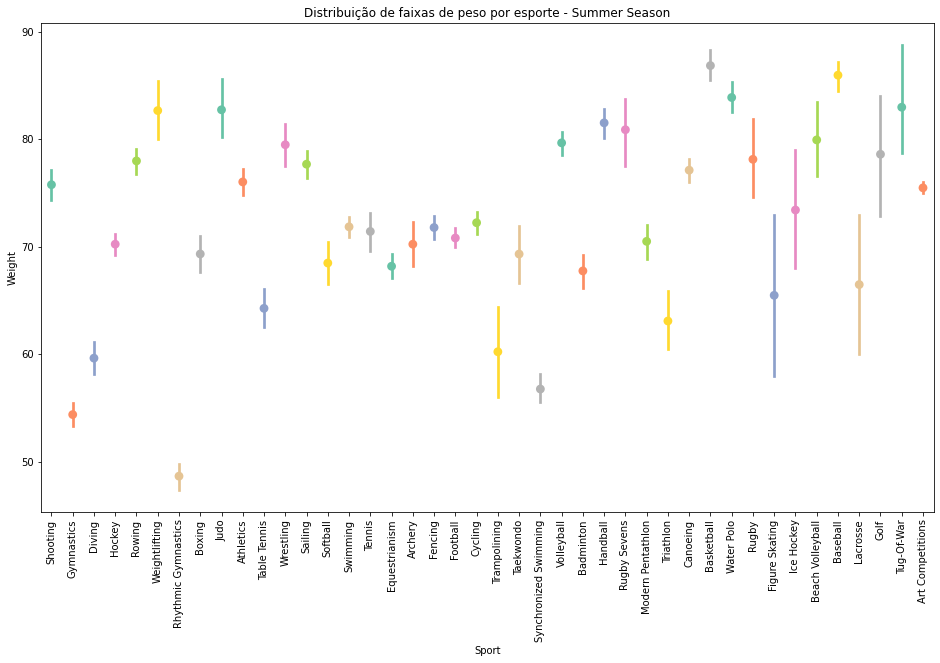

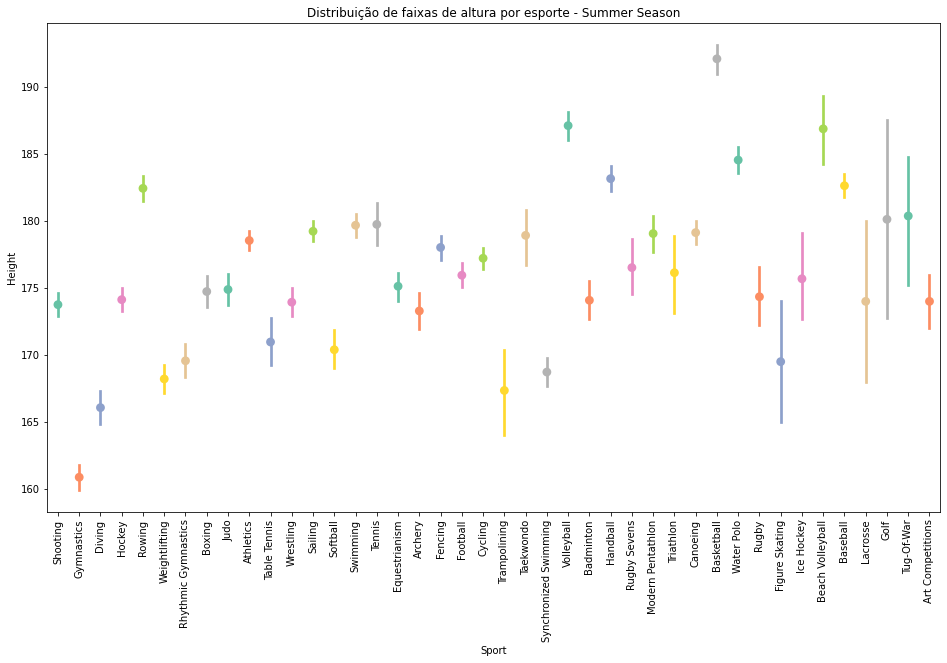

In [62]:
# Summer
hwaux = df_summer[["Sex", "Height", "Weight", "Sport"]]
hw2 = hwaux.groupby(["Height","Weight", "Sport"], as_index=False).sum()
hw2 = hw2.dropna()

# Peso
plt.figure(figsize=(16, 9))
sns.pointplot(x='Sport', y='Weight', data=hw2, palette='Set2')
plt.xticks(rotation=90)
plt.title('Distribuição de faixas de peso por esporte - Summer Season');

# Altura
plt.figure(figsize=(16, 9))
sns.pointplot(x='Sport', y='Height', data=hw2, palette='Set2')
plt.xticks(rotation=90)
plt.title('Distribuição de faixas de altura por esporte - Summer Season');

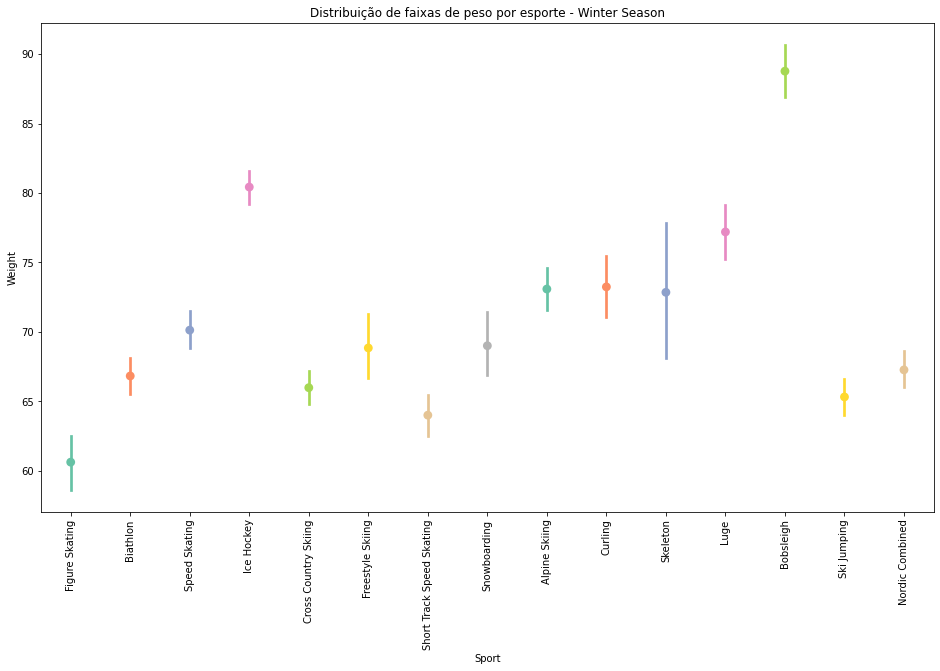

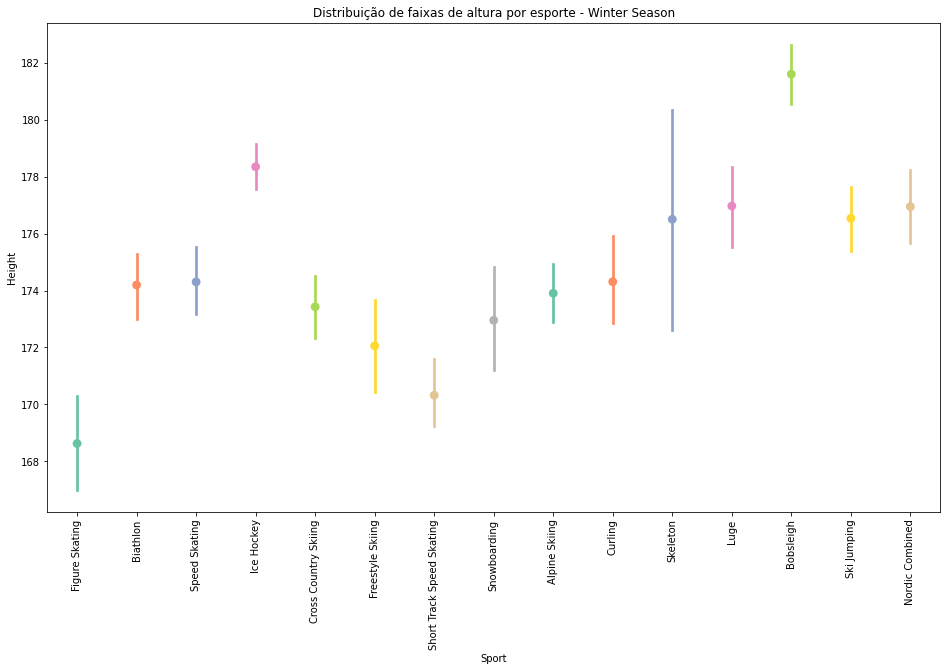

In [63]:
# Winter
hwauxw = df_winter[["Sex", "Height", "Weight", "Sport"]]
hw2w = hwauxw.groupby(["Height","Weight", "Sport"], as_index=False).sum()
hw2w = hw2w.dropna()

# Peso
plt.figure(figsize=(16, 9))
sns.pointplot(x='Sport', y='Weight', data=hw2w, palette='Set2')
plt.xticks(rotation=90)
plt.title('Distribuição de faixas de peso por esporte - Winter Season');

# Altura
plt.figure(figsize=(16, 9))
sns.pointplot(x='Sport', y='Height', data=hw2w, palette='Set2')
plt.xticks(rotation=90)
plt.title('Distribuição de faixas de altura por esporte - Winter Season');

Naturalmente, a distribuição de peso e altura são característicos para cada esporte. Os suspostos outliers que aparecem no gráficos de comparação Peso x Altura correspondem aos esportes que demandam tal porte físico. Basqueste, Bobsleigh, Tug-of-war e modalidades de vôlei e rugby, por exemplo, apresentam atletas com perfil mais alto e pesado. Do lado oposto temos Figure Skating e Gymnastics, com perfil mais baixo e leve.

### 3.2.2) Análise da Idade (Age)

In [64]:
# Summer
df_age = df_summer[["Age", "Medal", "Sex"]]
athage = pd.get_dummies(df_age, columns=["Medal"]).groupby(["Age", "Sex"]).sum()
athage = athage[['Medal_Bronze', 'Medal_Silver', 'Medal_Gold']]
athage = athage.sort_values(by=['Age'], ascending=True).reset_index()
athage.head(10)

# Winter
df_agew = df_winter[["Age", "Medal", "Sex"]]
athagew = pd.get_dummies(df_agew, columns=["Medal"]).groupby(["Age", "Sex"]).sum()
athagew = athagew[['Medal_Bronze', 'Medal_Silver', 'Medal_Gold']]
athagew = athagew.sort_values(by=['Age'], ascending=True).reset_index()
athagew.head(10)

,Age,Sex,Medal_Bronze,Medal_Silver,Medal_Gold
0,13.0,F,0,0,1
1,14.0,F,0,0,1
2,14.0,M,1,0,0
3,15.0,F,6,4,5
4,15.0,M,0,3,0
5,16.0,F,5,9,4
6,16.0,M,2,1,3
7,17.0,M,3,6,3
8,17.0,F,14,8,13
9,18.0,F,17,13,20


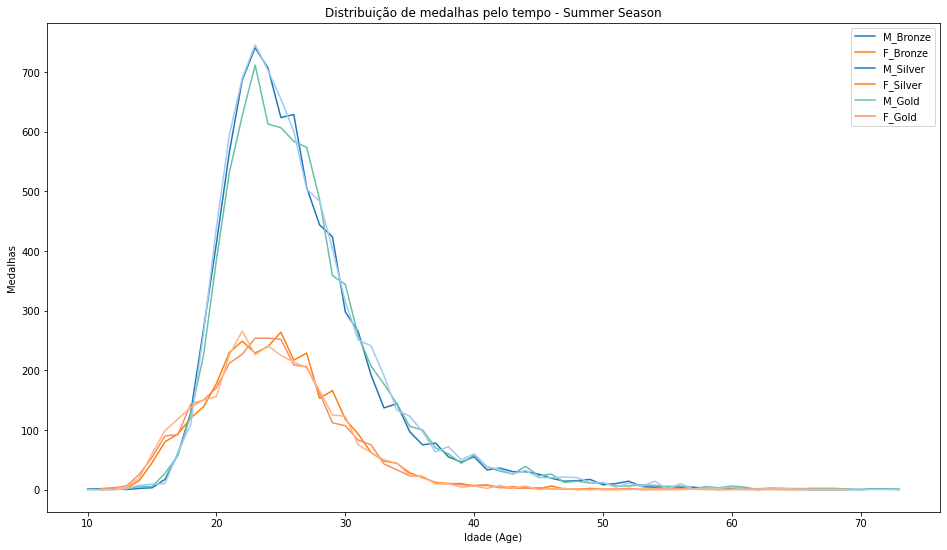

In [65]:
# Summer
plt.figure(figsize=(16, 9))
ax = sns.lineplot(x='Age', y='Medal_Bronze', data=athage, hue='Sex', hue_order=["M", "F"]).set_title("Distribuição de medalhas pelo tempo - Summer Season")
ax = sns.lineplot(x='Age', y='Medal_Silver', data=athage, hue='Sex', hue_order=["M", "F"], palette="Set2", legend=False)
ax = sns.lineplot(x='Age', y='Medal_Gold', data=athage, hue='Sex', hue_order=["M", "F"], palette="pastel",legend=False)
plt.xlabel("Idade (Age)")
plt.ylabel("Medalhas")
plt.legend(labels=['M_Bronze', 'F_Bronze', 'M_Silver', 'F_Silver', 'M_Gold', 'F_Gold'])
plt.show()

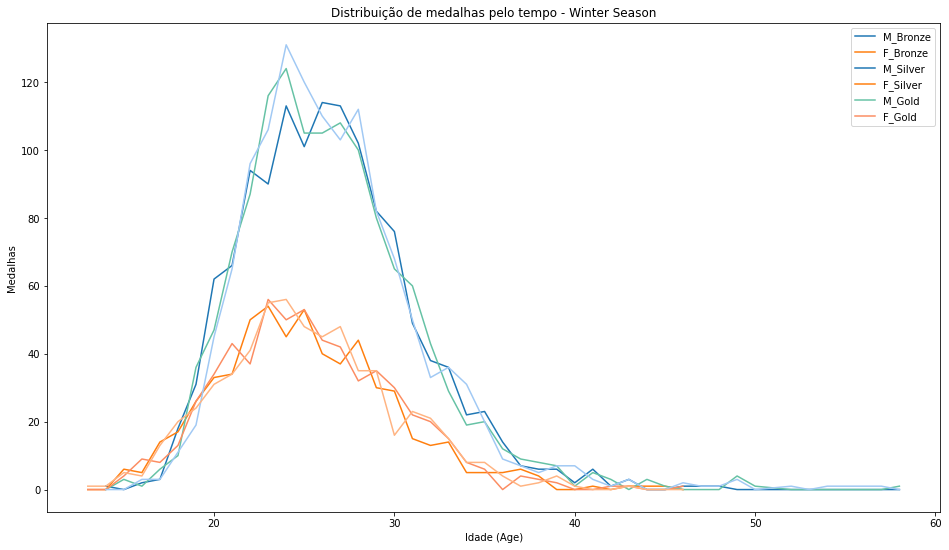

In [66]:
# Winter
plt.figure(figsize=(16, 9))
ax = sns.lineplot(x='Age', y='Medal_Bronze', data=athagew, hue='Sex', hue_order=["M", "F"]).set_title("Distribuição de medalhas pelo tempo - Winter Season")
ax = sns.lineplot(x='Age', y='Medal_Silver', data=athagew, hue='Sex', hue_order=["M", "F"], palette="Set2", legend=False)
ax = sns.lineplot(x='Age', y='Medal_Gold', data=athagew, hue='Sex', hue_order=["M", "F"], palette="pastel",legend=False)
plt.xlabel("Idade (Age)")
plt.ylabel("Medalhas")
plt.legend(labels=['M_Bronze', 'F_Bronze', 'M_Silver', 'F_Silver', 'M_Gold', 'F_Gold'])
plt.show()

In [67]:
print("Summer Season")
display(df_summer.groupby("Sex").agg({"Age": ["min", "max", "median", "mean", "std"]}))

print("Winter Season")
display(df_winter.groupby("Sex").agg({"Age": ["min", "max", "median", "mean", "std"]}))


Summer Season


Age                                  
      min   max median       mean       std
Sex                                        
F    11.0  69.0   24.0  24.237654  5.421098
M    10.0  73.0   25.0  26.474097  6.276925

Winter Season


Age                                  
      min   max median       mean       std
Sex                                        
F    13.0  46.0   24.0  24.862500  4.831394
M    14.0  58.0   26.0  26.295288  4.837212

Do gráfico e dos dados estatístico acima, podemos perceber que a maioria das medalhas adquiridas se concentram na faixa entre 20 e 30 anos -> isto pode ser explicado pela maior quantidade de pessoas participantes concentradas nesta faixa de idade.

Podemos explorar mais este fato:

In [68]:
# Summer
df_age2 = df_summer[["Age", "Sex"]]
athage2 = pd.get_dummies(df_age2, columns=["Sex"]).groupby(["Age"]).sum()
athage2.reset_index()
athage2F = athage2[["Sex_F"]]
athage2M = athage2[["Sex_M"]]

# Winter
df_age2w = df_winter[["Age", "Sex"]]
athage2w = pd.get_dummies(df_age2w, columns=["Sex"]).groupby(["Age"]).sum()
athage2w.reset_index()
athage2Fw = athage2w[["Sex_F"]]
athage2Mw = athage2w[["Sex_M"]]

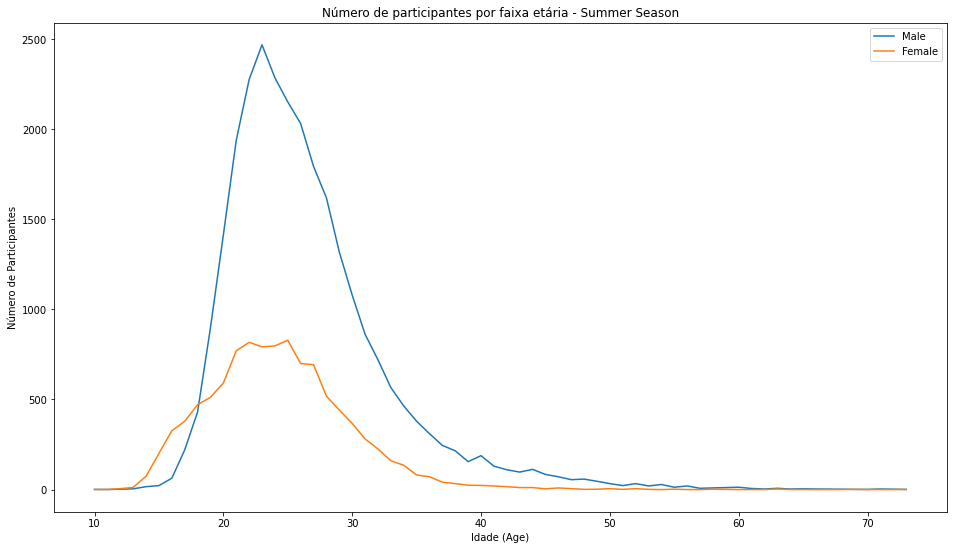

In [69]:
# Summer
plt.figure(figsize=(16, 9))
ax = sns.lineplot(x=athage2M.index, y='Sex_M', data=athage2M).set_title("Número de participantes por faixa etária - Summer Season")
ax = sns.lineplot(x=athage2F.index, y='Sex_F', data=athage2F)
plt.xlabel("Idade (Age)")
plt.ylabel("Número de Participantes")
plt.legend(labels=['Male', 'Female']);

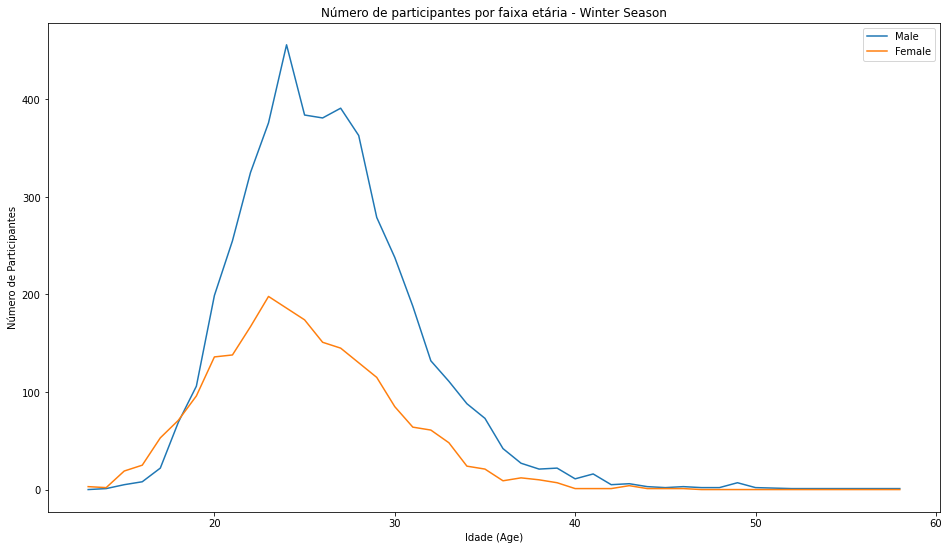

In [70]:
# Winter
plt.figure(figsize=(16, 9))
ax = sns.lineplot(x=athage2Mw.index, y='Sex_M', data=athage2Mw).set_title("Número de participantes por faixa etária - Winter Season")
ax = sns.lineplot(x=athage2Fw.index, y='Sex_F', data=athage2Fw)
plt.xlabel("Idade (Age)")
plt.ylabel("Número de Participantes")
plt.legend(labels=['Male', 'Female']);

Como esperado, podemos perceber que a curva de medalhas acumuladas por faixa etária corresponde diretamente ao número de participantes presente em cada faixa também. Assim, não podemos afirmar que a idade é fator determinante para a aquisição de medalhas, até porque diferentes esportes podem comportar diferentes faixas etárias. 

Para reiterar esta proposição, podemos visualizar um panorama geral da distribuição de idade por esporte:

In [71]:
# Summer
df_sport = df_summer[["Age", "Sport"]]
sport = df_sport.groupby(["Age", "Sport"], as_index=False).sum()

# Winter
df_sportw = df_winter[["Age", "Sport"]]
sportw = df_sportw.groupby(["Age", "Sport"], as_index=False).sum()

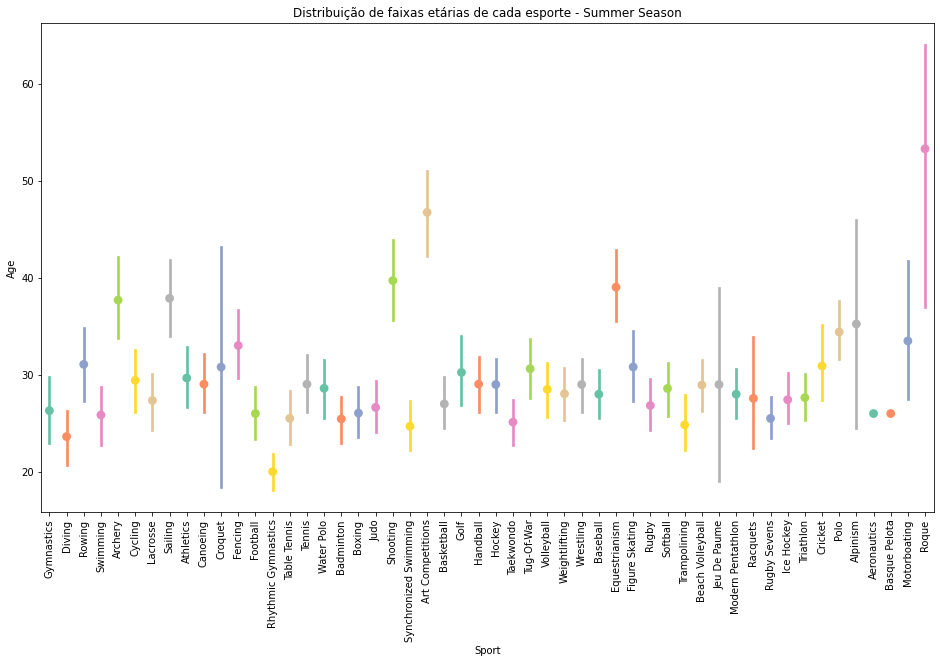

In [72]:
# Summer
plt.figure(figsize=(16, 9))
sns.pointplot(x='Sport', y='Age', data=sport, palette='Set2')
plt.xticks(rotation=90)
plt.title('Distribuição de faixas etárias de cada esporte - Summer Season');

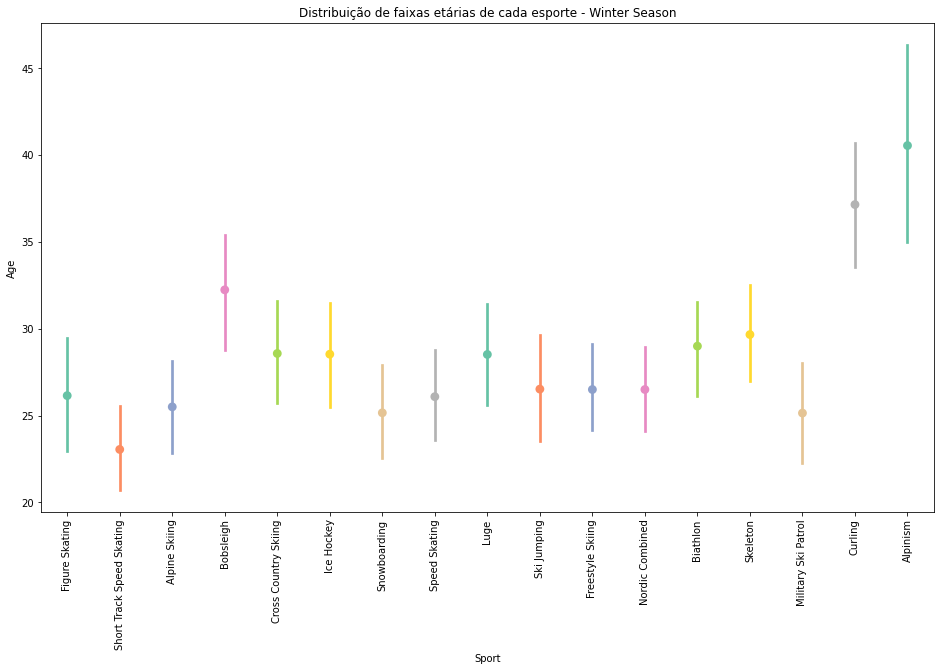

In [73]:
# Winter
plt.figure(figsize=(16, 9))
sns.pointplot(x='Sport', y='Age', data=sportw, palette='Set2')
plt.xticks(rotation=90)
plt.title('Distribuição de faixas etárias de cada esporte - Winter Season');

Podemos perceber que existem variações bastantes significativas de idade para alguns esportes, apesar da maioria se encontrar na faixa intermediária de 20 a 30 anos. Na Summer Season, "Art Competition" e "Roque" se destacam pelas maiores idades, seuidos por "Archery", "Sailing", "Shooting" e "Equestrianism". Na Winter Season, "Curling" e "Alpinism" se destacam.

Podemos também nos aprofundar nos diferentes esportes observando como é a aquisição de medalhas nas variadas relações de peso e altura para tentar identificar se existe algum tipo de relação:

In [74]:
df_hwsport = df[["Height", "Weight", "Sport", "Medal"]]
hwsport = dfsum_sex = pd.get_dummies(df_hwsport, columns=["Medal"]).groupby(["Height", "Weight", "Sport"], as_index=False).sum()
hwsport["Total_Medal"] = hwsport["Medal_Gold"] + hwsport["Medal_Silver"] + hwsport["Medal_Bronze"]
hwsporth = hwsport[["Sport", "Height", "Weight", "Total_Medal"]]

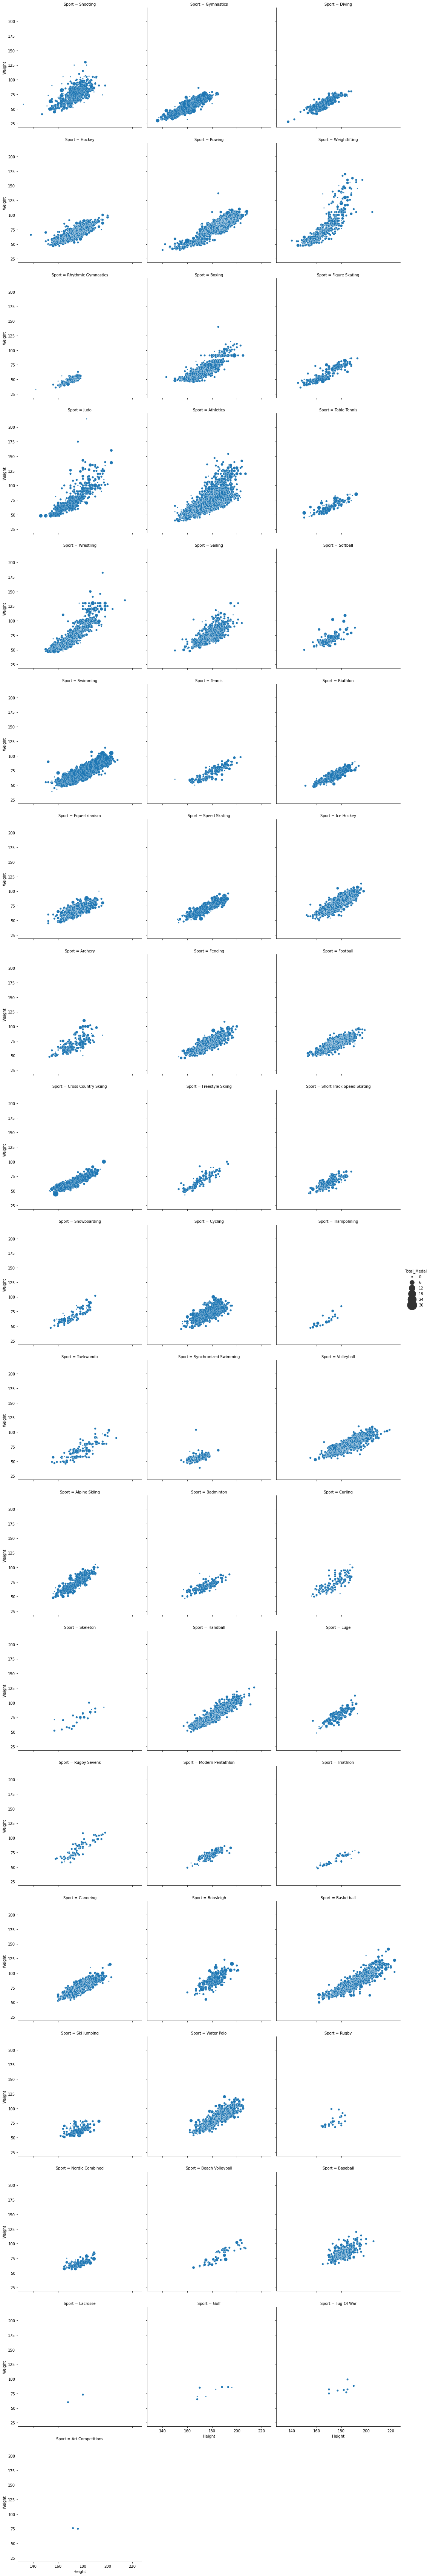

In [75]:
sns.relplot(data=hwsporth,x="Height", y="Weight", col="Sport", kind="scatter", size="Total_Medal", sizes=(10, 700), col_wrap=3);

# 4) Conclusão

É difícil encontrar correlações que apontam para a qualidade do desempenho dos atletas apenas com os dados fornecidos. É natural que a maioria dos atletas indicados para participar das Olímpiadas estão devidamente preparados, com porte físico adequado à modalidade e ao esporte que praticam. Apesar das faixas de peso, altura e idade apresentarem considerável variância, pudemos observar que não são, necessariamente, fatores decisivos para a aquisição de medalhas.

O fator idade também não é muito conclusivo. Pudemos perceber que as idades, assim como o peso e a altura, estão devidamente distribuídas pelos esportes e não correspondem, necessariamente, à performance dos atletas.

Um insight notável nesta análise diz respeito ao gap entre o número de homens e de mulheres participantes. Este, tem se tornado cada vez menor, ou seja, a representatividade feminina nos jogos aumenta cada vez mais (e a tendência é de que continue a subir).

Apesar de não conseguir encontrar relações entre os medalhistas e os dados fornecidos é interessante notar que, aplicando um modelo de aprendizado de máquina, talvez seja possível classificar o atleta no esporte que pratica, uma vez que esta relação está bastante clusterizada.